In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import * 
from fastai.metrics import accuracy

In [0]:
path = 'data/pokemon'

In [0]:
get_image_files??

Signature:
get_image_files(
    c:Union[pathlib.Path, str],
    check_ext:bool=True,
    recurse=False,
) -> Collection[pathlib.Path]
Source:   
def get_image_files(c:PathOrStr, check_ext:bool=True, recurse=False)->FilePathList:
    "Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`."
    return get_files(c, extensions=(image_extensions if check_ext else None), recurse=recurse)
File:      /data/anaconda/envs/fastai/lib/python3.6/site-packages/fastai/vision/data.py
Type:      function


In [0]:
fnames = get_image_files(path, recurse=True)
fnames[:3]

[PosixPath('data/pokemon/squirtle/00000089.png'),
 PosixPath('data/pokemon/squirtle/00000170.png'),
 PosixPath('data/pokemon/squirtle/00000215.jpg')]

In [0]:
bs = 32
size = 224

In [0]:
src = (ImageList.from_folder(path, recurse=True)
       .split_by_rand_pct(0.2)
       .label_from_folder())

In [0]:
data = (src.transform(get_transforms(), size=size)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

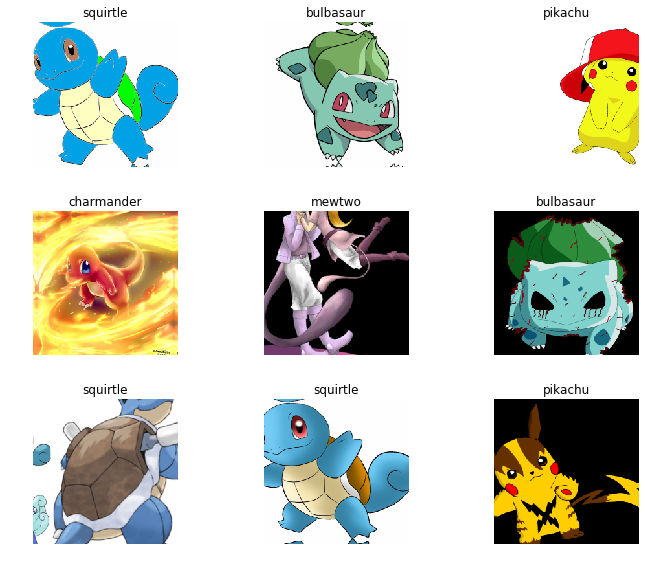

In [0]:
data.show_batch(3, figsize=(10,8))

## Prepare model

In [0]:
arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch, metrics = accuracy)

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [0]:
lr = 1e-3
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.291655,0.078521,0.987805,00:17
1,0.168762,0.318868,0.878049,00:12
2,0.138009,0.014693,1.000000,00:12


In [0]:
# learn.save('resnet50-1')
# learn.load('resnet50-1')
learn.unfreeze()
# learn.lr_find()


In [0]:
learn.recorder.plot(suggestion=True)

NameError: name 'learn' is not defined

In [0]:
lr = slice(1e-6/3,1e-4/3)
learn.fit_one_cycle(6, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.264129,0.164449,0.969027,00:26
1,0.256449,0.143599,0.969027,00:26
2,0.225916,0.127755,0.969027,00:26
3,0.193707,0.118882,0.969027,00:27
4,0.183807,0.112182,0.969027,00:26
5,0.171910,0.112876,0.969027,00:27


In [0]:
learn.save('pokemon-resnet-unfreeze')
learn.export('pokemon-resnet-unfreeze.pkl')

In [0]:
!ls -l data/pokemon

total 100484
drwxrwxr-x 2 harveynguyen harveynguyen     12288 May 30 05:29 bulbasaur
drwxrwxr-x 2 harveynguyen harveynguyen     12288 May 30 05:42 charmander
drwxrwxr-x 2 harveynguyen harveynguyen     12288 May 30 05:38 mewtwo
drwxrwxr-x 2 harveynguyen harveynguyen      4096 May 30 05:48 models
drwxrwxr-x 2 harveynguyen harveynguyen     12288 May 30 05:46 pikachu
-rw-rw-r-- 1 harveynguyen harveynguyen 102826079 May 30 05:52 pokemon-resnet-unfreeze
drwxrwxr-x 2 harveynguyen harveynguyen     12288 May 30 05:50 squirtle
